## Chapter04 추측통계의 기본
_ 일부 데이터로부터 전체의 통계적 성질을 추측하는 방식이 "추측통계"입니다.
- 추측통계와 비교하여 2장과 3장에서 다른 통계를 "기술통계"라고 합니다. 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['score'])
# scores[:10]

## 4.1 모집단과 표본 
- 추측통계에서는 관측 대상 전체의 통계적 성질을 그 관측 대상의 일부분만 사용하여 추측합니다. 
- 이때, 추측하고 싶은 관측 대상 전체를 모집단(population)이라고 하고, 추측에 사용하는 관측 대상의 일부분을 표본(sample)이라 합니다 
- 모집단에서 표본을 골라내는 일을 표본추출(sampling)이라 하고, 골라낸 표본의 수를 '표본크기' 또는 '샘플사이즈'라고 합니다 
- 표본을 바탕으로 계싼한 평균이나 분산, 상관계수 등을 '표본통계량'이라고 하고, 모집단의 평균이나 분산, 상관계수 등을 '모수'라고 합니다. 
- 표본평균으로 모평균을 추측할 때, '표본평균은 모평균의 추정량(estimator)라고 합니다.' 실제 표본의 데이터를 이용하여 계산한 결과를 '추정값estimator'라고 합니다. 

### 4.1.1 표본추출 방법
- 임의료 표본을 추출하는 방법을 '무작위추출(random sampling)'이라고 합니다 
- 복원추출: 여러차례 동일한 표본을 선택하는 추출방법 
- 비복원추출: 동일한 표본은 한번만 선택하는 방법

In [3]:
np.random.choice([1,2,3],3)

array([2, 3, 2])

In [4]:
np.random.choice([1,2,3],3,replace=False)

array([1, 2, 3])

In [5]:
# 난수 seed사용 
np.random.seed(0)
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [6]:
np.random.seed(0)
sample = np.random.choice(scores,20)
sample.mean()

70.4

In [7]:
scores.mean()

69.53

In [8]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 72.45
2번째 무작위 추출로 얻은 표본평균 63.7
3번째 무작위 추출로 얻은 표본평균 66.05
4번째 무작위 추출로 얻은 표본평균 71.7
5번째 무작위 추출로 얻은 표본평균 74.15


## 4.2 확률모형
- 확률은 사건에 대해서 정의됨. ('눈이1'이라는 사건에 대한 확률은 1/6) ('눈이홀수'라는 사건에 대한 확률은 1/2)
- 확률분포: 확률 변수가 특정한 값을 가질 확률을 나타내는 함수를 의미함. (주사위의 눈을 확률변수X, 확률분포A라고 하면, '확률변수 X는 확률분포 A를 따른다.'라고 합니다. 수식으로 X~A로 나타낼 수 있습니다.) 
- 확률모형: 확률을 사용한 무작위추출 또는 주사위를 모델링한 것
- 시행: 확률변수의 결과를 관측하는 것
- 실현값: 시행에 의해 관측되는 값
- 사건: 시행결과로 나타날 수 있는 일
- 근원사건: '눈이1'처럼 더 세부적으로 분해할 수 없는 사건

#### '사건이 서로 배반이라면, 그중에 적어도 하나 일어나는 사건은 각 사건의 확률의 합과 같다.' 사건이 상호배반(mutually exclusive)이라는 것은 각 사건이 동시에는 일어날 수 없다는 말입니다. 

In [9]:
dice = [1, 2, 3, 4, 5, 6]
prob = [1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [10]:
np.random.choice(dice, p=prob)

1

In [11]:
num_trial = 100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([4, 6, 4, 5, 5, 6, 6, 3, 5, 6, 5, 6, 6, 2, 3, 1, 6, 5, 6, 3, 4, 5,
       3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5, 4, 6, 2, 6, 4, 5, 3, 4, 6,
       5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6, 2, 2, 4, 5, 1, 6, 4, 3, 2,
       2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3, 6, 6, 4, 2, 1, 6, 4, 4, 2,
       4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4])

In [12]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq, 'relative frequency':freq/num_trial},
            index=pd.Index(np.arange(1,7),name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,9,0.09
3,13,0.13
4,27,0.27
5,19,0.19
6,27,0.27


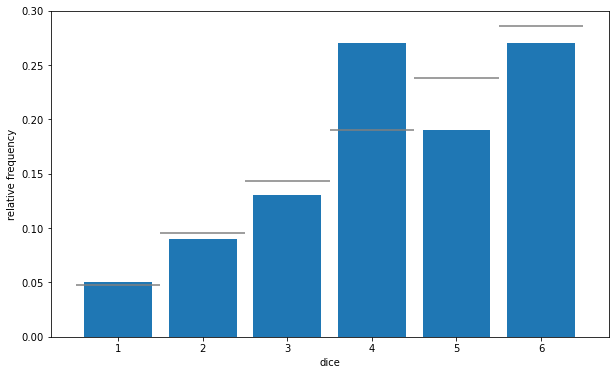

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
# 실제의 확률분포를 가로선으로 표시
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
# 막대 그래프의 [1.5, 2.5, ..., 6.5]에 눈금을 표시
ax.set_xticks(np.linspace(1.5, 6.5, 6))
# 주사위 눈의 값은 [1, 2, 3, 4, 5, 6]
ax.set_xticklabels(np.arange(1, 7)) # label값만 붙인다.
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

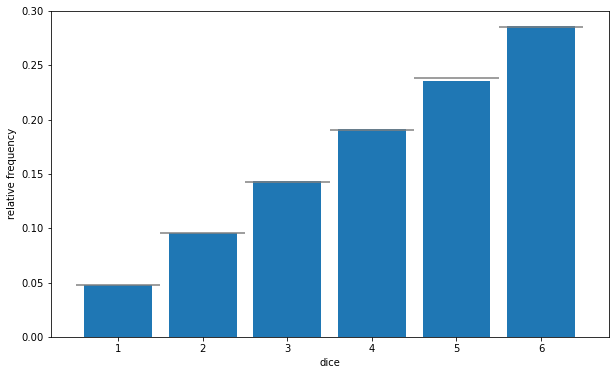

In [19]:
# 시행횟수를 점점늘리면, 상대도수는 확률분포로 수렴되어 갑니다.
num_trial = 100000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

## 4.3 추측통계의 확률

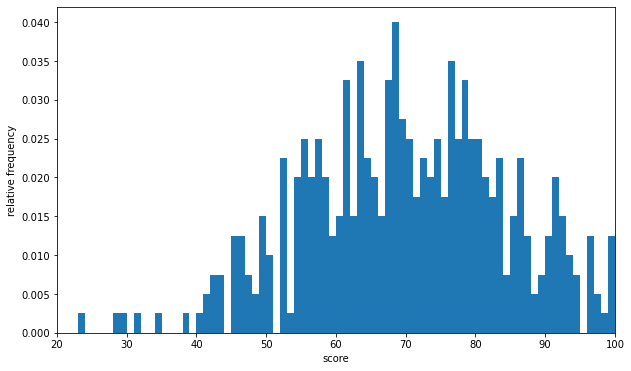

In [26]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(scores, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

In [27]:
np.random.choice(scores)

74

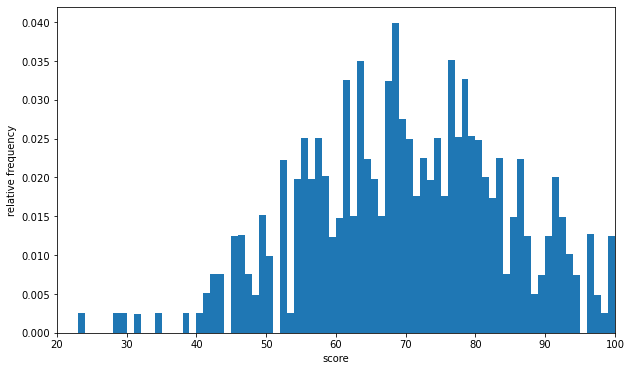

In [29]:
sample = np.random.choice(scores, 1000000)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=100, range=(0, 100), density=True)
ax.set_xlim(20, 100)
ax.set_ylim(0, 0.042)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

69.50948500000001 69.53


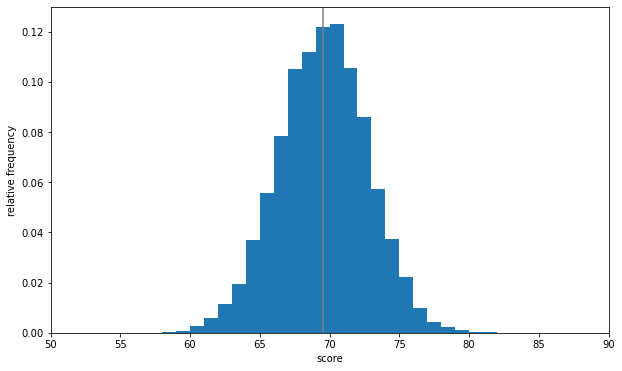

In [35]:
# 표본평균은 산포도(scatter,dispersion) 그자체이므로, 모평균을 중심으로 분포함.
# 이것이 무작위추출에 의한 표본평균으로 모평균을 추측할 수 있는 근거임. 
sample_means = [np.random.choice(scores, 20).mean()
                for _ in range(10000)]
print(np.mean(sample_means),np.mean(scores))
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample_means, bins=100, range=(0, 100), density=True)
# 모평균을 세로선으로 표시
ax.vlines(np.mean(scores), 0, 1, 'gray')
ax.set_xlim(50, 90)
ax.set_ylim(0, 0.13)
ax.set_xlabel('score')
ax.set_ylabel('relative frequency')
plt.show()

추측통계는 크게 추정과 검정으로 나눌 수 있음 
- 추정(estimation): 모수를 추측하는 것. 하나의 값으로 추정하는 것을 점추정, 구간으로 추정하는 것을 구간추정이라고 부릅니다. 
- 검정(test): 모집단의 통계적 성질에 대해 가설을 세우고 그 가설이 옳은지 여부를 판단하는 기법. 